In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [25]:
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("test.csv")

In [3]:
df.head()

BuildNumber                                  CommitId     PackageName  \
0           99  f113b770eb32956d2405ff0b7f08efd2dedc5e24  AST-Core-Tests   
1           99  f113b770eb32956d2405ff0b7f08efd2dedc5e24  AST-Core-Tests   
2           99  f113b770eb32956d2405ff0b7f08efd2dedc5e24  AST-Core-Tests   
3           99  f113b770eb32956d2405ff0b7f08efd2dedc5e24  AST-Core-Tests   
4           99  f113b770eb32956d2405ff0b7f08efd2dedc5e24  AST-Core-Tests   

           ClassName                     selector  \
0  ASTEvaluationTest                 testEvaluate   
1  ASTEvaluationTest       testEvaluateForContext   
2  ASTEvaluationTest      testEvaluateForReceiver   
3   NumberParserTest                     testFail   
4   NumberParserTest  testFloatFromStreamAsNumber   

                                          sourceCode  numberOfGlobalsUsed  \
0  testEvaluate\r\tself assert: (RBLiteralNode va...                    0   
1  testEvaluateForContext\r\t| varForTesting node...                    0   
2  testEvaluateForReceiver\r\t| receiver node |\r...                    0   
3  testFail\r\t"Verify that the value of a failbl...                    0   
4  testFloatFromStreamAsNumber\r\t"This covers pa...                    0   

   numberOfClassesUsed  numberOfMessagesUsed  numberOfLocalVariables  lines  
0                    2                     6                       0      3  
1                    1                    12                       2     21  
2                    1                     9                       2      9  
3                    1                     2                       0      3  
4                    1                     6                       2     43

In [13]:
clustering_df = df.sourceCode
clustering_df = clustering_df.str.replace(r'(["\'])(?:(?=(\\?))\2.)*?\1',' ', regex=True)
clustering_df = clustering_df.str.replace(r'[\[\(|\r][a-zA-Z1-9]*\s*:=',' ', regex=True)
clustering_df = clustering_df.replace(r'[^a-zA-Z1-9]',' ', regex=True)
clustering_df = clustering_df.replace(r'[A-Z][a-zA-Z1-9]*\s',' ', regex=True)
clustering_df = clustering_df.str.replace(r'[\s(0-9)*\s]',' ', regex=True)
clustering_df = clustering_df.str.replace(r'\s+',' ', regex=True)

In [5]:
df.sourceCode[1]

'testEvaluateForContext\r\t| varForTesting node |\r\tvarForTesting := 4@5.\r\r\t"first we test if we can read the temp varForTesting"\r\tnode := thisContext method variableNodes first.\r\tself assert: (node evaluateForContext: thisContext) equals: varForTesting.\r\r\t"lets check self, super"\r\tnode := RBVariableNode selfNode.\r\tself assert: (node evaluateForContext: thisContext) equals: thisContext receiver.\r\tnode := RBVariableNode superNode.\r\tself assert: (node evaluateForContext: thisContext) equals: thisContext receiver.\r\r\t"thisContext is not the thisContext of this method though... it is the context of the evaluating doit"\r\tnode := RBVariableNode thisContextNode.\r\tself deny: (node evaluateForContext: thisContext) equals: thisContext.\t\r\r\t"reading ivars works, too"\r\tnode := RBVariableNode named: \'testSelector\'.\r\tself assert: (node evaluateForContext: thisContext) equals: #testEvaluateForContext.'

In [14]:
clustering_df[1]

'test var node var node this method variable first self assert node evaluate this equals var node self self assert node evaluate this equals this receiver node super self assert node evaluate this equals this receiver node this self deny node evaluate this equals this node named self assert node evaluate this equals test '

<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (52). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (53). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (54). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (55). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found smaller than n_clusters (56). Possibly due to duplicate points in X.
  km = km.fit(X)
<ipython-input-20-cedebbedf65b>:20: ConvergenceWarning: Number of distinct clusters (51) found 

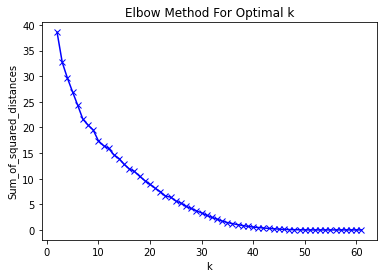

NameError: name 'WordCloud' is not defined

In [20]:
clustering_df = df.sourceCode
clustering_df = clustering_df.str.replace(r'(["\'])(?:(?=(\\?))\2.)*?\1',' ', regex=True)
clustering_df = clustering_df.str.replace(r'[\[\(|\r][a-zA-Z1-9]*\s*:=',' ', regex=True)
clustering_df = clustering_df.replace(r'[^a-zA-Z1-9]',' ', regex=True)
clustering_df = clustering_df.replace(r'[A-Z][a-zA-Z1-9]*\s',' ', regex=True)
clustering_df = clustering_df.str.replace(r'[\s(0-9)*\s]',' ', regex=True)
clustering_df = clustering_df.str.replace(r'\s+',' ', regex=True)
newdf = df
newdf['sourceCode'] = clustering_df
newdf = newdf.pivot(columns="PackageName", values="sourceCode")
columns = newdf.columns
vectorizer = TfidfVectorizer(stop_words=['self','assert','equals'])
for i in range(24,225,25):
        package = newdf[columns[i]].dropna()
        X = vectorizer.fit_transform(package)
        Sum_of_squared_distances = []
        K = range(2,len(package))
        for k in K:
           km = KMeans(n_clusters=k, max_iter=200, n_init=10)
           km = km.fit(X)
           Sum_of_squared_distances.append(km.inertia_)
        plt.plot(K, Sum_of_squared_distances, 'bx-')
        plt.xlabel('k')
        plt.ylabel('Sum_of_squared_distances')
        plt.title('Elbow Method For Optimal k')
        plt.show()

In [22]:
true_k = 35
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
cl=pd.DataFrame(list(zip(df['PackageName'],df['ClassName'],df['selector'],labels)),columns=['PackageName','ClassName','title','cluster'])
print(cl.sort_values(by=['cluster']))

       PackageName              ClassName  \
26  AST-Core-Tests      NumberParsingTest   
25  AST-Core-Tests      NumberParsingTest   
24  AST-Core-Tests      NumberParsingTest   
23  AST-Core-Tests      NumberParsingTest   
22  AST-Core-Tests      NumberParsingTest   
..             ...                    ...   
54  AST-Core-Tests      RBDumpVisitorTest   
60  AST-Core-Tests  RBErrorNodeParserTest   
59  AST-Core-Tests  RBErrorNodeParserTest   
37  AST-Core-Tests      RBDumpVisitorTest   
39  AST-Core-Tests      RBDumpVisitorTest   

                                                title  cluster  
26                                testIntegerReadFrom        0  
25                              testIntegerFromString        0  
24                             testFloatReadWithRadix        0  
23                    testFloatFromStringWithExponent        0  
22                        testFloatFromStringAsNumber        0  
..                                                ...      ...  
54  

In [23]:
cl

PackageName              ClassName  \
0   AST-Core-Tests      ASTEvaluationTest   
1   AST-Core-Tests      ASTEvaluationTest   
2   AST-Core-Tests      ASTEvaluationTest   
3   AST-Core-Tests       NumberParserTest   
4   AST-Core-Tests       NumberParserTest   
..             ...                    ...   
57  AST-Core-Tests  RBErrorNodeParserTest   
58  AST-Core-Tests  RBErrorNodeParserTest   
59  AST-Core-Tests  RBErrorNodeParserTest   
60  AST-Core-Tests  RBErrorNodeParserTest   
61  AST-Core-Tests  RBErrorNodeParserTest   

                                                title  cluster  
0                                        testEvaluate       19  
1                              testEvaluateForContext       19  
2                             testEvaluateForReceiver       16  
3                                            testFail       21  
4                         testFloatFromStreamAsNumber       12  
..                                                ...      ...  
57  testFaultyBinaryMessageSendWithLiteralArgument...       23  
58                                  testFaultyCascade       28  
59   testFaultyMessageSendShouldHaveTheCorrectMessage       32  
60  testFaultyMessageSendWithLiteralArgumentShould...       31  
61  testFaultyMessageSendWithSymbolsArgumentShould...        2  

[62 rows x 4 columns]

In [26]:
wc = WordCloud(width=1500, height= 1000,background_color="black", max_words=50)

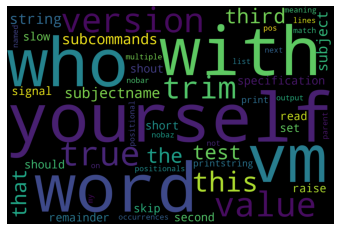

In [27]:
wc = WordCloud(width=1500, height= 1000,background_color="black", max_words=50)
wc.generate_from_frequencies(vectorizer.vocabulary_)
plt.imshow(wc)
plt.axis("off")
plt.show()

In [28]:
print(vectorizer.vocabulary_)

{'test': 95, 'context': 24, 'evaluate': 33, 'activate': 0, 'output': 72, 'lineending': 58, 'activation': 1, 'set': 83, 'on': 71, 'execute': 34, 'subject': 93, 'flag': 38, 'named': 65, 'id': 44, 'add': 2, 'flags': 39, 'includes': 50, 'cmd': 20, 'subcommands': 92, 'arg': 4, 'argv': 6, 'match': 61, 'copy': 25, 'remainder': 81, 'read': 80, 'deny': 27, 'is': 51, 'word': 107, 'next': 66, 'bar': 14, 'at': 10, 'bad': 11, 'identical': 45, 'badflag': 13, 'badcommand': 12, 'arguments': 5, 'leftovers': 55, 'isempty': 52, 'command': 22, 'doc': 30, 'lines': 59, 'hello': 42, 'string': 91, 'documenter': 31, 'explain': 35, 'ends': 32, 'current': 26, 'line': 57, 'first': 37, 'second': 82, 'third': 98, 'begins': 16, 'specification': 90, 'as': 7, 'skip': 88, 'shout': 86, 'who': 105, 'parent': 73, 'lang': 53, 'language': 54, 'meaning': 62, 'value': 102, 'slow': 89, 'not': 69, 'clap': 18, 'this': 99, 'dir': 28, 'list': 60, 'multiple': 63, 'true': 101, 'directory': 29, 'occurrences': 70, 'collect': 21, 'all'